<a href="https://colab.research.google.com/github/danielecaliari/AML/blob/main/progetto_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [26]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/MyDrive/"
base_dir = root_dir + 'progetto_AML/' 

Mounted at /content/drive


In [27]:
train = pd.read_csv( base_dir + 'train.tsv', sep='\t')

In [28]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


#DATA ANALYSIS

In [29]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [30]:
train.isnull().sum(axis=0)

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [31]:
#split category column in three different columns
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label") 

In [32]:
train['main_category'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
train = train.drop('category_name', axis=1)

In [33]:
#fill missing values
train.brand_name.fillna(value = "Unknown", inplace = True)
train.item_description.fillna(value = "No description", inplace = True)


In [34]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Unknown,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [35]:
#count of the categories
maincat_count = train['main_category'].value_counts()
subcat1_count = train['subcat_1'].value_counts()
subcat2_count = train['subcat_2'].value_counts()

maincat_count = pd.DataFrame({'name':maincat_count.index, 'count':maincat_count.values})
subcat1_count = pd.DataFrame({'name':subcat1_count.index, 'count':subcat1_count.values})
subcat2_count = pd.DataFrame({'name':subcat2_count.index, 'count':subcat2_count.values})

In [36]:
#function to plot catgories
def plot_counts(category, title):
  n = category['name'].head(10).unique().__len__()+1
  all_colors = list(plt.cm.colors.cnames.keys())
  random.seed(100)
  c = random.choices(all_colors, k=n)

  # Plot Bars
  plt.figure(figsize=(10,5), dpi= 80)
  plt.bar(category['name'].head(10), category['count'].head(10), color=c, width=.5)
  for i, val in enumerate(category['count'].head(10).values):
      plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

  # Decoration
  plt.gca().set_xticklabels(category['name'].head(10), rotation=60, horizontalalignment= 'right')
  plt.title(title, fontsize=22)
  plt.ylabel('# Products')
  plt.show()

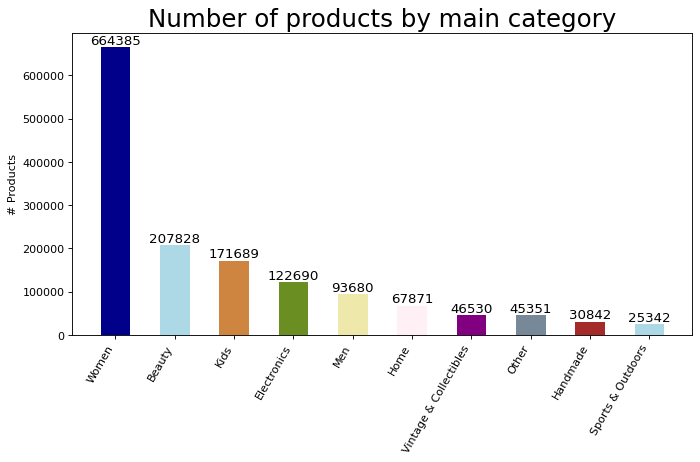

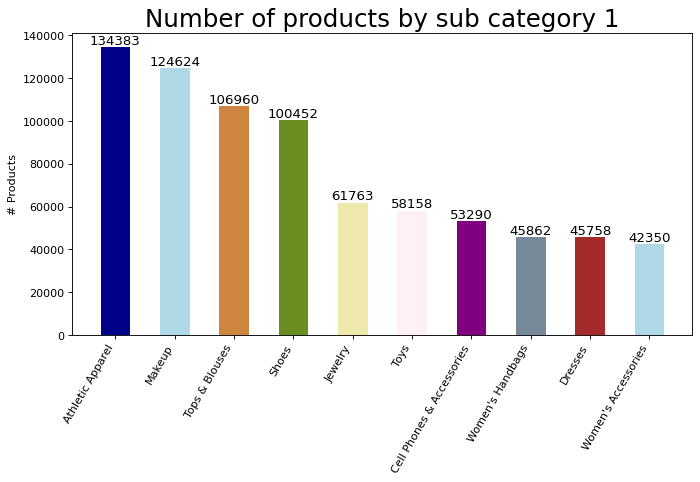

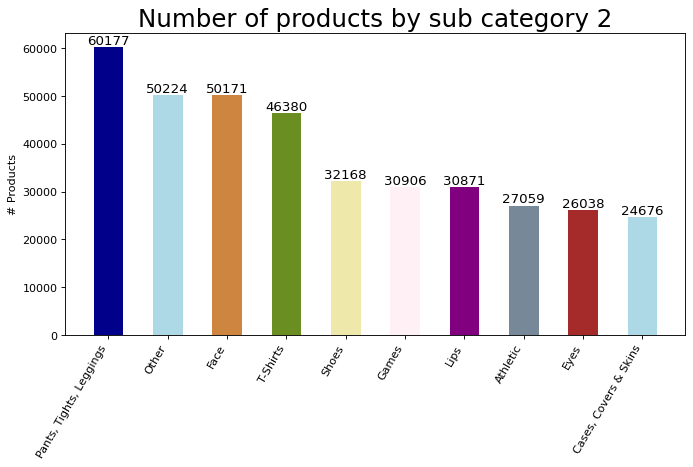

In [37]:
plot_counts(maincat_count, "Number of products by main category")
plot_counts(subcat1_count, "Number of products by sub category 1")
plot_counts(subcat2_count, "Number of products by sub category 2")

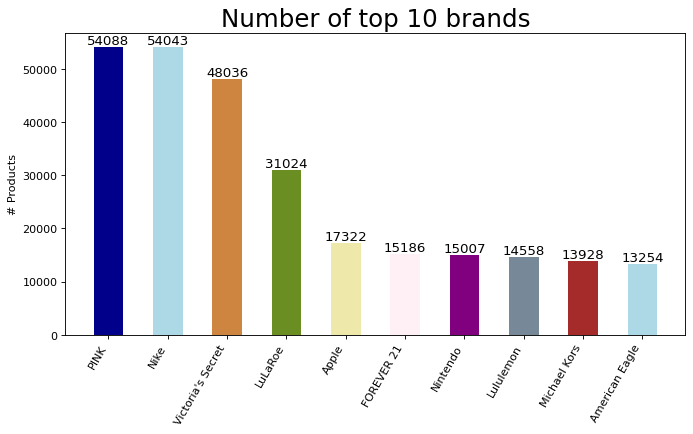

In [38]:
#brand count
brand_count = train['brand_name'].value_counts()
#exclude the first row because is "Unknow" and we want to see only known brands
brand_count = pd.DataFrame({'name':brand_count.index, 'count':brand_count.values})[1:]
plot_counts(brand_count, "Number of top 10 brands")

In [68]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

No handles with labels found to put in legend.


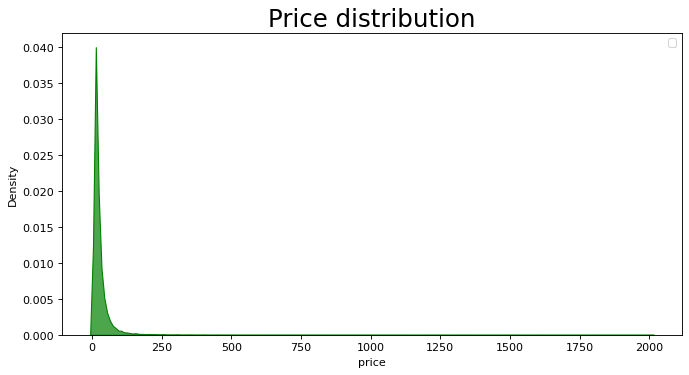

In [49]:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(train['price'], shade=True, color="g", alpha=.7)

# Decoration
plt.title('Price distribution', fontsize=22)
plt.legend()
plt.show()

## da trasformare in un'altra distribuzine??

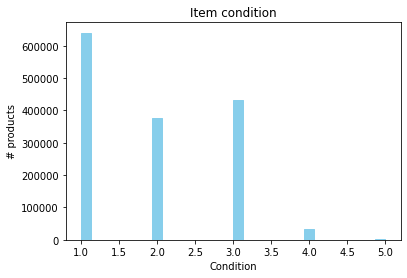

In [53]:
#item condition
plt.title("Item condition")
plt.xlabel("Condition")
plt.ylabel("# products")
plt.hist(train['item_condition_id'], color = "skyblue", ec="skyblue", bins = 30);

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


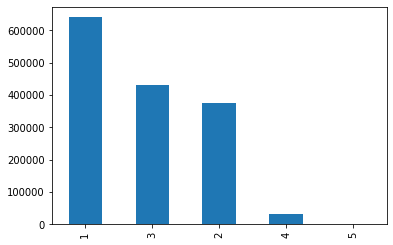

In [65]:
print(train['item_condition_id'].value_counts())
train['item_condition_id'].value_counts().plot(kind='bar');